In [216]:
__author__ = "Tom Curran"

import pandas as pd
import numpy as np
from scipy.linalg import norm
import scipy.linalg as la
import matplotlib.pyplot as plt


# Problem 1

In [21]:
A = np.random.random((6,4))
Q,R = la.qr(A, mode = 'economic')

# Verify that R is upper triangular, Q is orthonormal, and QR = A.
np.allclose(np.triu(R), R)
np.allclose(Q.T @ Q, np.identity(4))
np.allclose(Q @ R, A)


def modified_gramschmidt(A):
    m, n = np.shape(A)

    q = np.copy(A)
    r = np.zeros((n,n))

    for i in range(0,n):
        r[i,i] = la.norm(q[:,i])
        q[:,i] = q[:,i] / r[i,i]
        for j in range(i+1,n):
            r[i,j] = q[:,j] @q[:,i]
            q[:,j] = q[:,j] - ( r[i,j] * q[:,i])

    return(q,r)

In [23]:
A2 = np.random.random((4,4))
q1, r1 = modified_gramschmidt(A2)
print(np.allclose(np.triu(r1), r1))
print(np.allclose(q1.T @ q1, np.identity(4)))
print(np.allclose(q1 @ r1, A2))

True
True
True


# Problem 2

Write a function that accepts an invertible matrix A. Use the QR decomposition of A and (3.1) to calculate |det(A)|. You may use your QR decomposition algorithm from Problem 1 or SciPy’s QR routine. Can you implement this function in a single line?
(Hint: np.diag() and np.prod() may be useful.)
Check your answer against la.det(), which calculates the determinant.

In [33]:
def detQR(A):
    return(np.prod(np.diag(la.qr(A)[1])))

In [37]:
print("Error: ",la.det(A)-detQR(A))

Error:  0.20055815590128034


# Problem 3

Problem 3. Write a function that accepts an invertible n ⇥ n matrix A and a vector b of length n. Use the QR decomposition to solve Ax = b in the following steps:
1. Compute Q and R.
2. Calculate y = QTb.
3. Use back substitution to solve Rx = y for x.

In [68]:
def lin_system(A, b):
    print(A)
    print(b)
    q, r = la.qr(A)
    
    m, n = A.shape
    
    y = q.T @ b
    
    x = np.zeros([len(b)])
  
    
    for i in range(n-1,-1,-1):
        #print("X at point {}".format(i))
        
        x[i] = b[i]/A[i,i]
        
        for j in range(0, i):
            b[j] = b[j] - (A[j,i] * x[i])
            
    return(print("Back Subsitution: {}".format(x)))
    

In [69]:
b = np.array([1,2,3,4])
A3 = np.random.random((4,4))
p3 = lin_system(A3, b)
print(p3)

[[0.3383647  0.25772245 0.33049093 0.96307184]
 [0.97278626 0.50297536 0.29284887 0.24994275]
 [0.50444192 0.88808074 0.21459504 0.22144405]
 [0.03982702 0.65078908 0.42162724 0.13699583]]
[1 2 3 4]
Back Subsitution: [-65.01860181   0.         -13.97981965  29.19796909]
None


# Problem 4

In [80]:
A = np.random.random((5,3))

Q,R = la.qr(A)

print(A.shape, Q.shape, R.shape)

print(np.allclose(Q @ R, A))

(5, 3) (5, 5) (5, 3)
True


In [119]:
def householder(A):
    m,n = A.shape
    
    R = A.copy()
    
    Q = np.identity(m)
    
    sign = lambda x: 1 if x >= 0 else -1
    
    for k in range(0, n):
        u = np.copy(R[k:,k])
        u[0] = u[0] + np.sign(u[0]) * la.norm(u)
        u = u / la.norm(u)
        
        R[k:, k:] = R[k:, k:] - 2*np.outer(u, (u.T @ R[k:, k:]))
        Q[k:, :]  = Q[k:, :] - 2*np.outer(u, (u.T @ Q[k:, :]))
        
    return Q.T, R

In [120]:
A = np.random.random((6,4))

In [121]:
Q_T, R = householder(A)

print(A.shape, Q_T.shape, R.shape)
np.allclose(Q_T @ R, A)

(6, 4) (6, 6) (6, 4)


True

# Problem 5

In [172]:
def hessenberg(A):
    m, n = A.shape 
    H = np.copy(A)
    Q = np.identity(m)
    
    for k in range(n-1):
        u = np.copy(H[k+1:, k])
        
        u[0] = u[0] + np.sign(u[0]) * la.norm(u)

        u = u / la.norm(u)

        H[k+1:, k:] = H[k+1:, k:]  - 2*np.outer(u, (u.T@H[k+1:, k:]))
        
        H[:, k+1:] = H[:, k+1:] - 2(u.T@(H[:,k+1:]@u))
        
        Q[k+1:, :] = Q[k+1:, :] - 2*np.outer(u, u.T@Q[k+1:, :])
        
    return(Q.T, H)


In [ ]:
A = np.random.random((8,8))
q, h = hessenberg(A)
np.allclose(np.triu(H, -1), H)
np.allclose(Q @ H @ Q.T, A)

# Least Squares and Eigen Values

## Problem 1

Problem 1. Write a function that accepts an m ⇥ n matrix A of rank n and a vector b of length n. Use the QR decomposition and (4.1) to solve the normal equations corresponding to Ax = b.
You may use either SciPy’s QR routine or one of your own QR routines. In addition, you may use la.solve_triangular(), SciPy’s optimized routine for solving triangular systems.

In [227]:
def leastSquares(A, b):
    q,r = modified_gramschmidt(A)
    s = np.dot(q.T, b)
    t = la.solve_triangular(r,s)
    return(t)

In [228]:
A = np.random.random((5,5))
b = np.random.random(5)
print(leastSquares(A, b))

[ 6.54495229 -4.24942385 -4.85458818 -3.88306478  5.29161605]


## Problem 2

Problem 2. The file housing.npy contains the purchase-only housing price index, a measure of how housing prices are changing, for the United States from 2000 to 2010.a Each row in the array is a separate measurement; the columns are the year and the price index, in that order. To avoid large numerical computations, the year measurements start at 0 instead of 2000.
Find the least squares line that relates the year to the housing price index (i.e., let year be the x-axis and index the y-axis).
1. Construct the matrix A and the vector b described by (4.2).
(Hint: np.vstack(), np.column_stack(), and/or np.ones() may be helpful.)
2. Use your function from Problem 1 to find the least squares solution.
3. Plot the data points as a scatter plot.
4. Plot the least squares line with the scatter plot.

In [229]:
housing = np.load("housing.npy")
print(pd.DataFrame(housing))

       0       1
0    0.0  136.86
1    0.5  142.70
2    1.0  146.53
3    1.5  152.65
4    2.0  156.08
5    2.5  163.71
6    3.0  168.12
7    3.5  176.16
8    4.0  182.12
9    4.5  193.75
10   5.0  201.04
11   5.5  214.33
12   6.0  219.40
13   6.5  224.39
14   7.0  223.85
15   7.5  223.79
16   8.0  211.57
17   8.5  203.97
18   9.0  193.75
19   9.5  193.51
20  10.0  187.84
21  10.5  187.59
22  11.0  177.82
23  11.5  181.29
24  12.0  178.66
25  12.5  188.22
26  13.0  190.87
27  13.5  203.11
28  14.0  203.56
29  14.5  212.70
30  15.0  214.26
31  15.5  224.90
32  16.0  226.51


In [232]:
A = np.column_stack((housing[:,0], np.ones(len(housing))))
b = housing[:,1]
least_sq = leastSquares(A, b)

array([  3.37476604, 164.08096257])

Text(0.5,0,'Period')

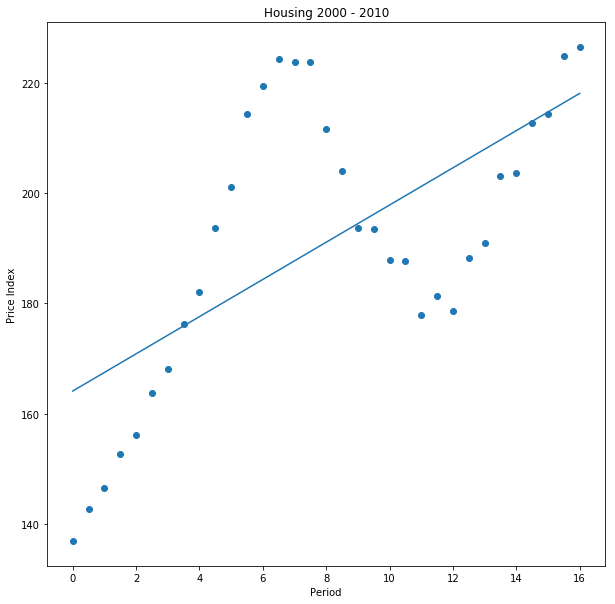

In [235]:
#plot

least_sq_val = A @ least_sq

%matplotlib inline
plt.figure(figsize = (10,10))
plt.scatter(housing[:,0], housing[:,1])
plt.plot(housing[:,0],least_sq_val)
plt.title("Housing 2000 - 2010")
plt.ylabel("Price Index")
plt.xlabel("Period")

## Problem 3